### Goal

- To 

In [1]:
#Import the libraries and Load the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')

In [2]:
#Data Exploration
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s3785,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,The Cuba Libre Story,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Data Cleaning
#Check for missing value
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
#Dropping or filling Missing values
df['director'] = df['director'].fillna('Unkown')
df['cast'] = df['cast'].fillna('unkown')
df['country'] = df['country'].fillna('unkown')
df['date_added'] = df['date_added'].fillna(0)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['duration'] = df['duration'].fillna(0)

In [30]:
#Convert date_added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [32]:
#Creating two new columns in the dataframe 
df['month'] = df['date_added'].dt.month
df['year'] = df['date_added'].dt.year

# Univariate Analysis
 1. Categorical - show_id, type, title, director, cast, country,rating, duration, listed_in, description, 
 2. Numeric - release_year, month, year
 3. date - date_added

In [60]:
#Categorical Variable Visualisation
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

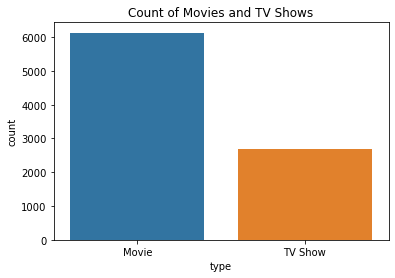

In [135]:
sns.countplot(data=df,x='type')
plt.title('Count of Movies and TV Shows')
plt.savefig('Count of Movies and TV Shows')
plt.show()

Observations:

Netflix has more Movies than TV Show

In [73]:
df['rating'].value_counts().head(10)

TV-MA    3211
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: rating, dtype: int64

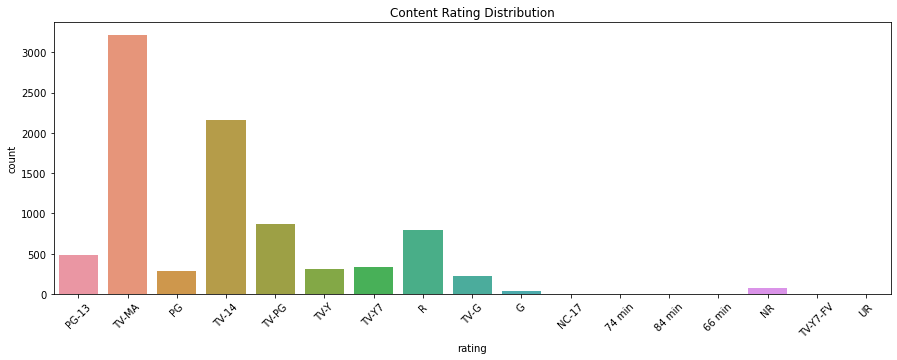

In [136]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='rating')
plt.xticks(rotation=45)
plt.title('Content Rating Distribution')
plt.savefig('Content Rating Distribution')
plt.show()

Observations:

TV-MA, TV-14 and TV-PG are the three top Content Rating.

In [79]:
df['duration'].value_counts().head(10)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
93 min        146
97 min        146
91 min        144
95 min        137
96 min        130
Name: duration, dtype: int64

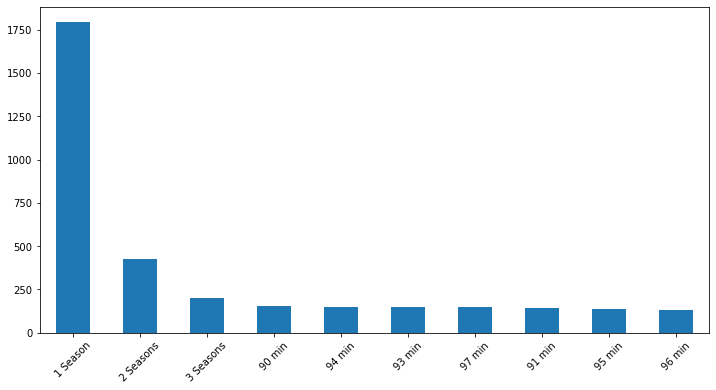

In [137]:
plt.figure(figsize=(12,6))
df['duration'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.savefig('Top 10 Duration of Movie and TV Shows')
plt.show()

Observations:

Season 1 of TV shows are mostly Viewed.

In [90]:
df['listed_in'].value_counts().head(20)

Dramas, International Movies                         362
Documentaries                                        359
Stand-Up Comedy                                      334
Comedies, Dramas, International Movies               274
Dramas, Independent Movies, International Movies     252
Kids' TV                                             220
Children & Family Movies                             215
Children & Family Movies, Comedies                   201
Documentaries, International Movies                  186
Dramas, International Movies, Romantic Movies        180
Comedies, International Movies                       176
Comedies, International Movies, Romantic Movies      152
Dramas                                               138
Dramas, International Movies, Thrillers              134
Action & Adventure, Dramas, International Movies     132
Action & Adventure                                   128
International TV Shows, TV Dramas                    121
Comedies, Dramas, Independent M

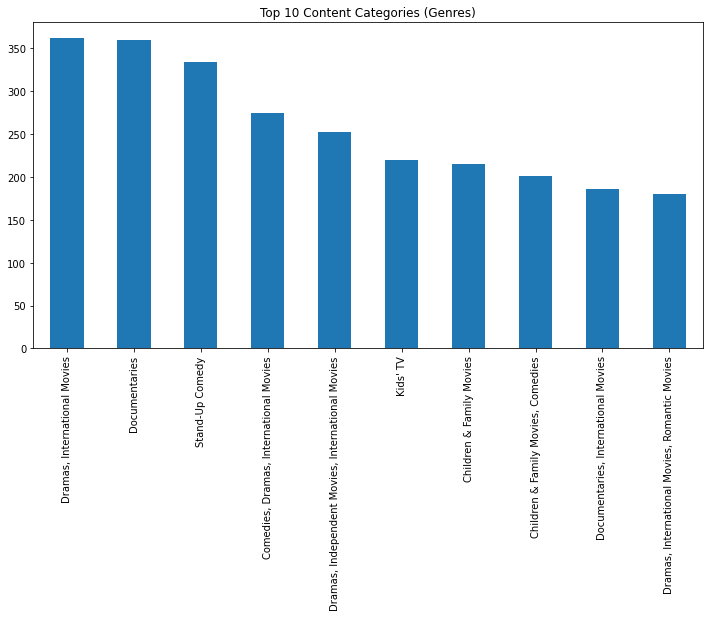

In [138]:
plt.figure(figsize=(12,6))
df['listed_in'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Content Categories (Genres)')
plt.savefig('Top 10 Content Categories (Genres)')
plt.show()

Observations:

Dramas, Internation Movies, Documenteries and Stand-Up Comedy are top 3 Geners

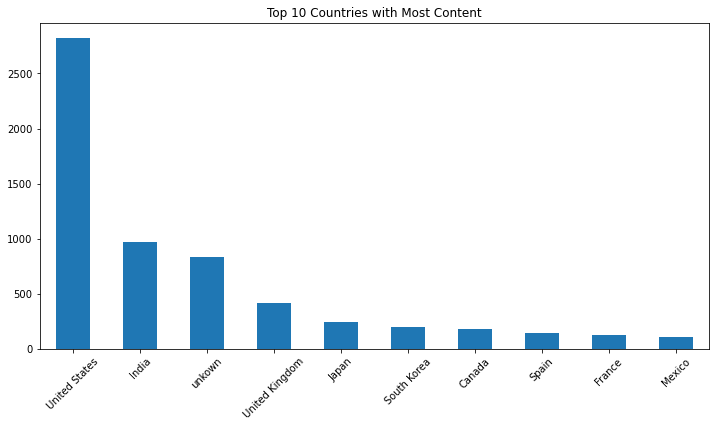

In [139]:
plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Countries with Most Content')
plt.savefig('Top 10 Countries with Most Content')
plt.show()

Observations:

United States has the most content on Netflix.

In [102]:
#Numerical Variable Visualisation
df['release_year'].describe()

count    8807.000000
mean     2014.180198
std         8.819312
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

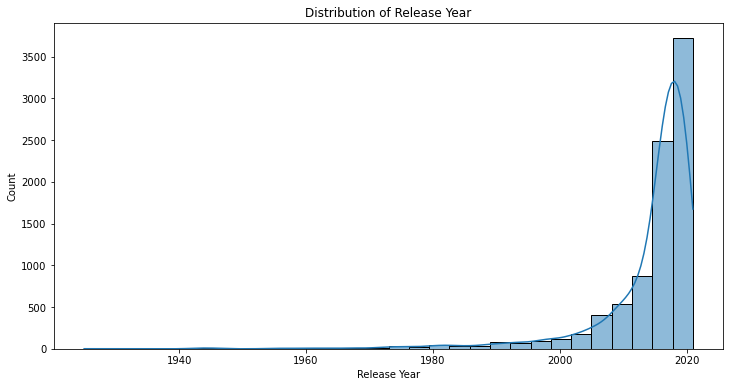

In [140]:
plt.figure(figsize=(12,6))
plt.title('Distribution of Release Year')
sns.histplot(data=df,x='release_year',bins=30,kde=True)
plt.xlabel('Release Year')
plt.savefig('Distribution of Release Year')
plt.show()

Observations:

Release Year data is left skewed.

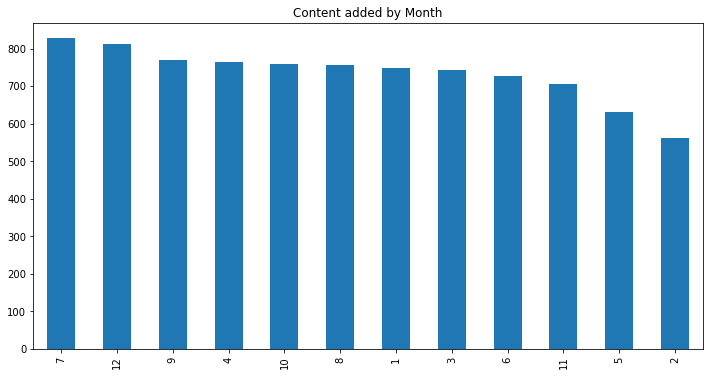

In [141]:
#Date Variable Analysis
plt.figure(figsize=(12,6))
plt.title('Content added by Month')
df['month'].value_counts().plot(kind='bar')
plt.savefig('Content added by Month')
plt.show()

Observations:

July, December have most added content.

In [127]:
df['year'].value_counts().head(10)

2019    2016
2020    1879
2018    1649
2021    1498
2017    1188
2016     429
2015      82
2014      24
2011      13
2013      11
Name: year, dtype: int64

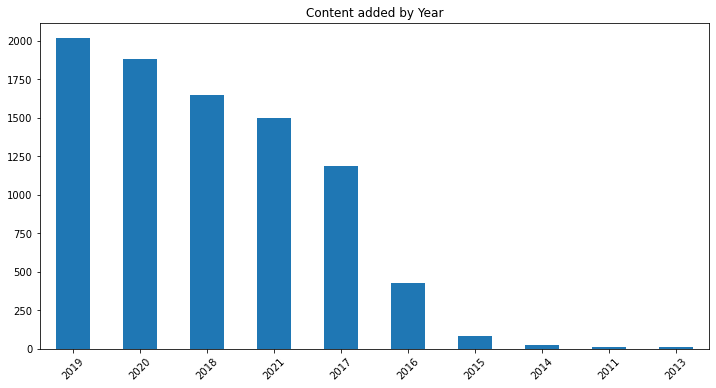

In [143]:
plt.figure(figsize=(12,6))
plt.title('Content added by Year')
df['year'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.savefig('Content added per Year')
plt.show()

Observations:

Year 2019 has the most number of added content.